In [1]:
# change dir
import os
if not os.path.exists('scripts'):
    os.chdir('../../')

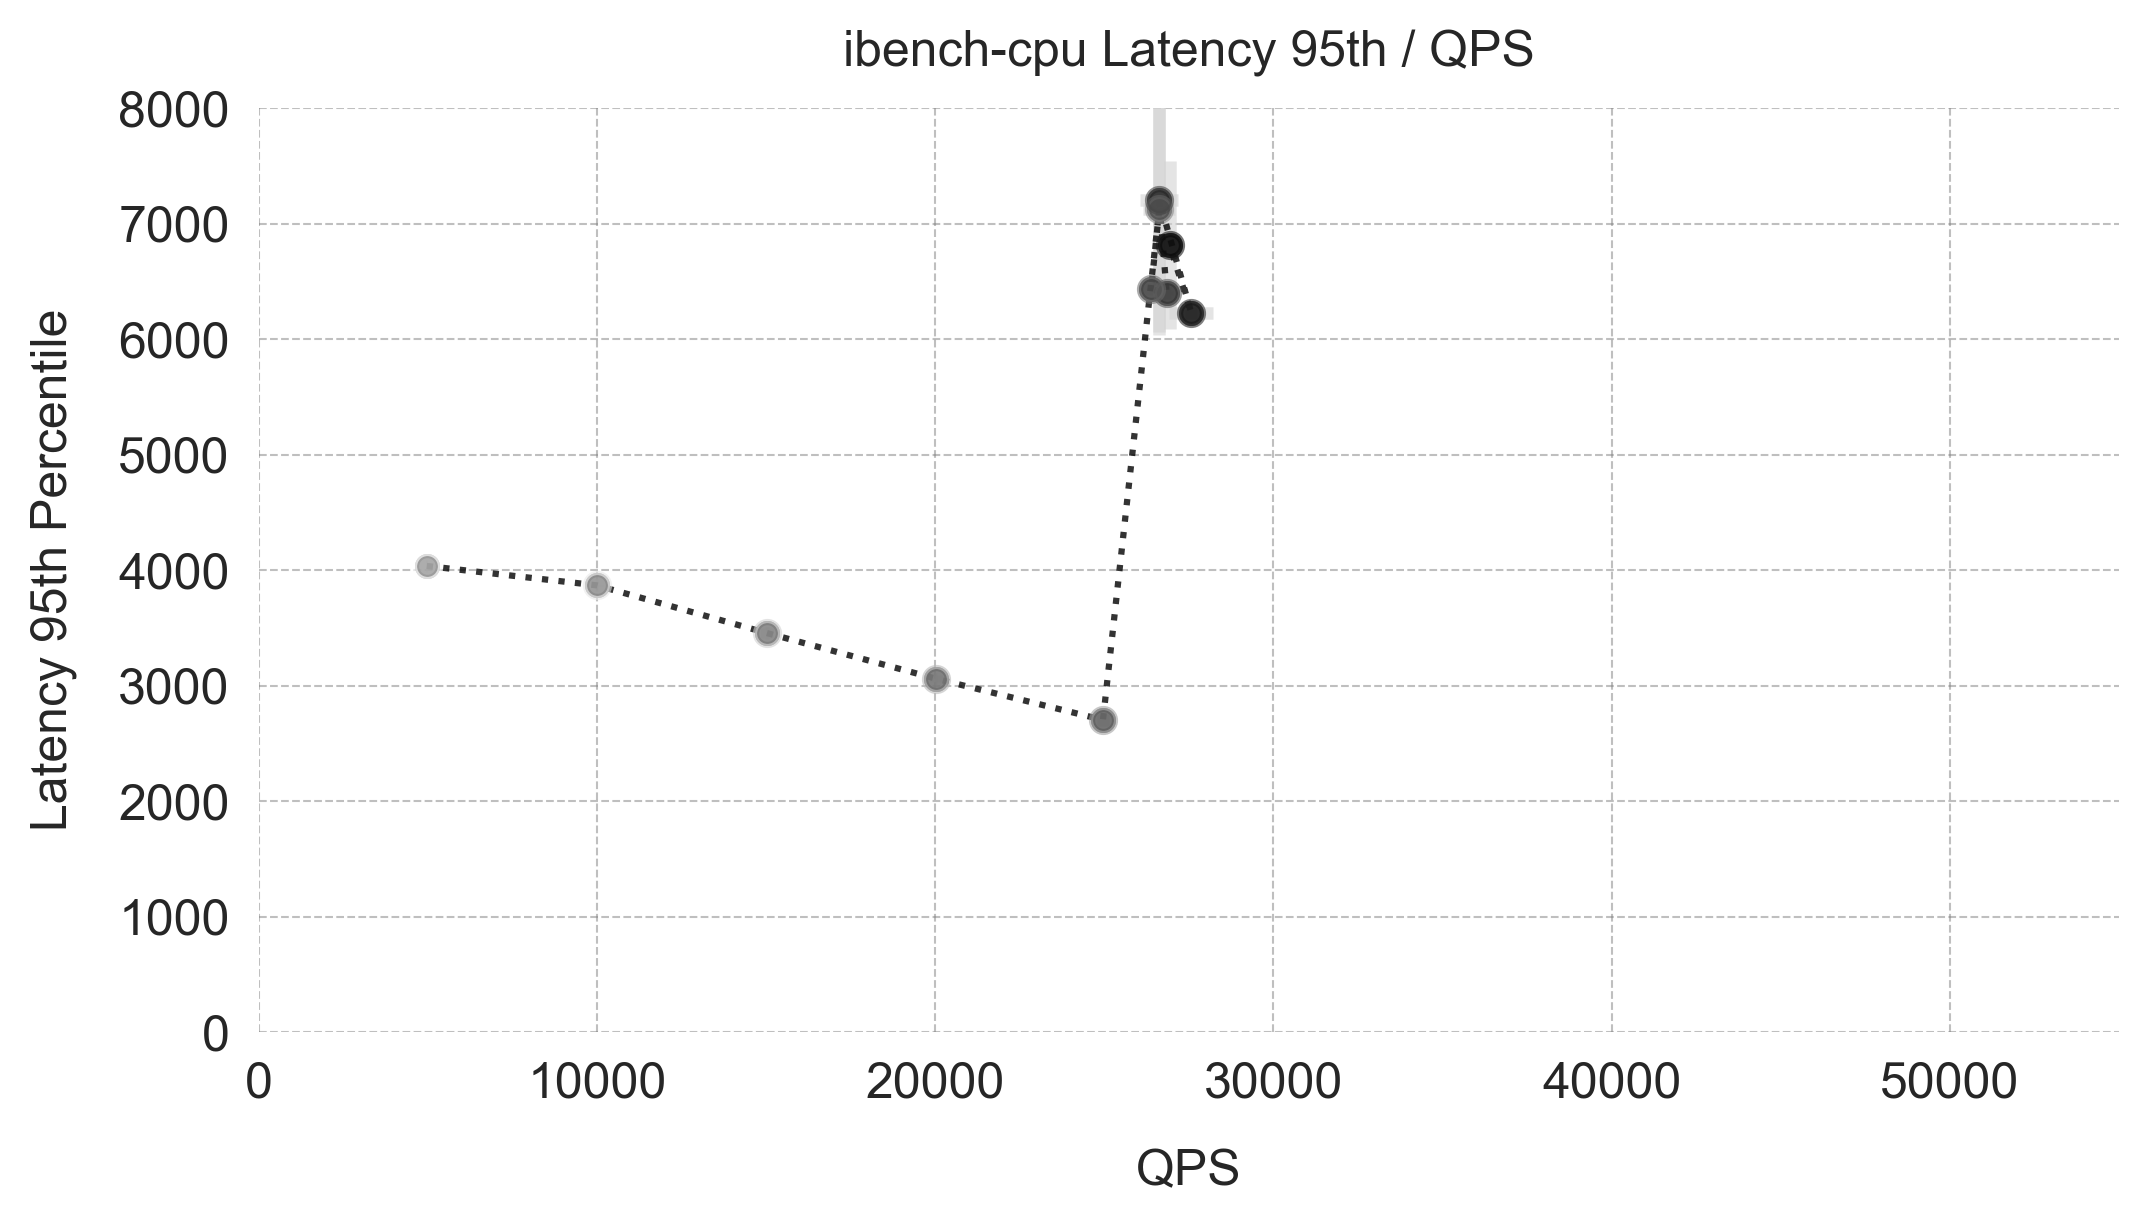

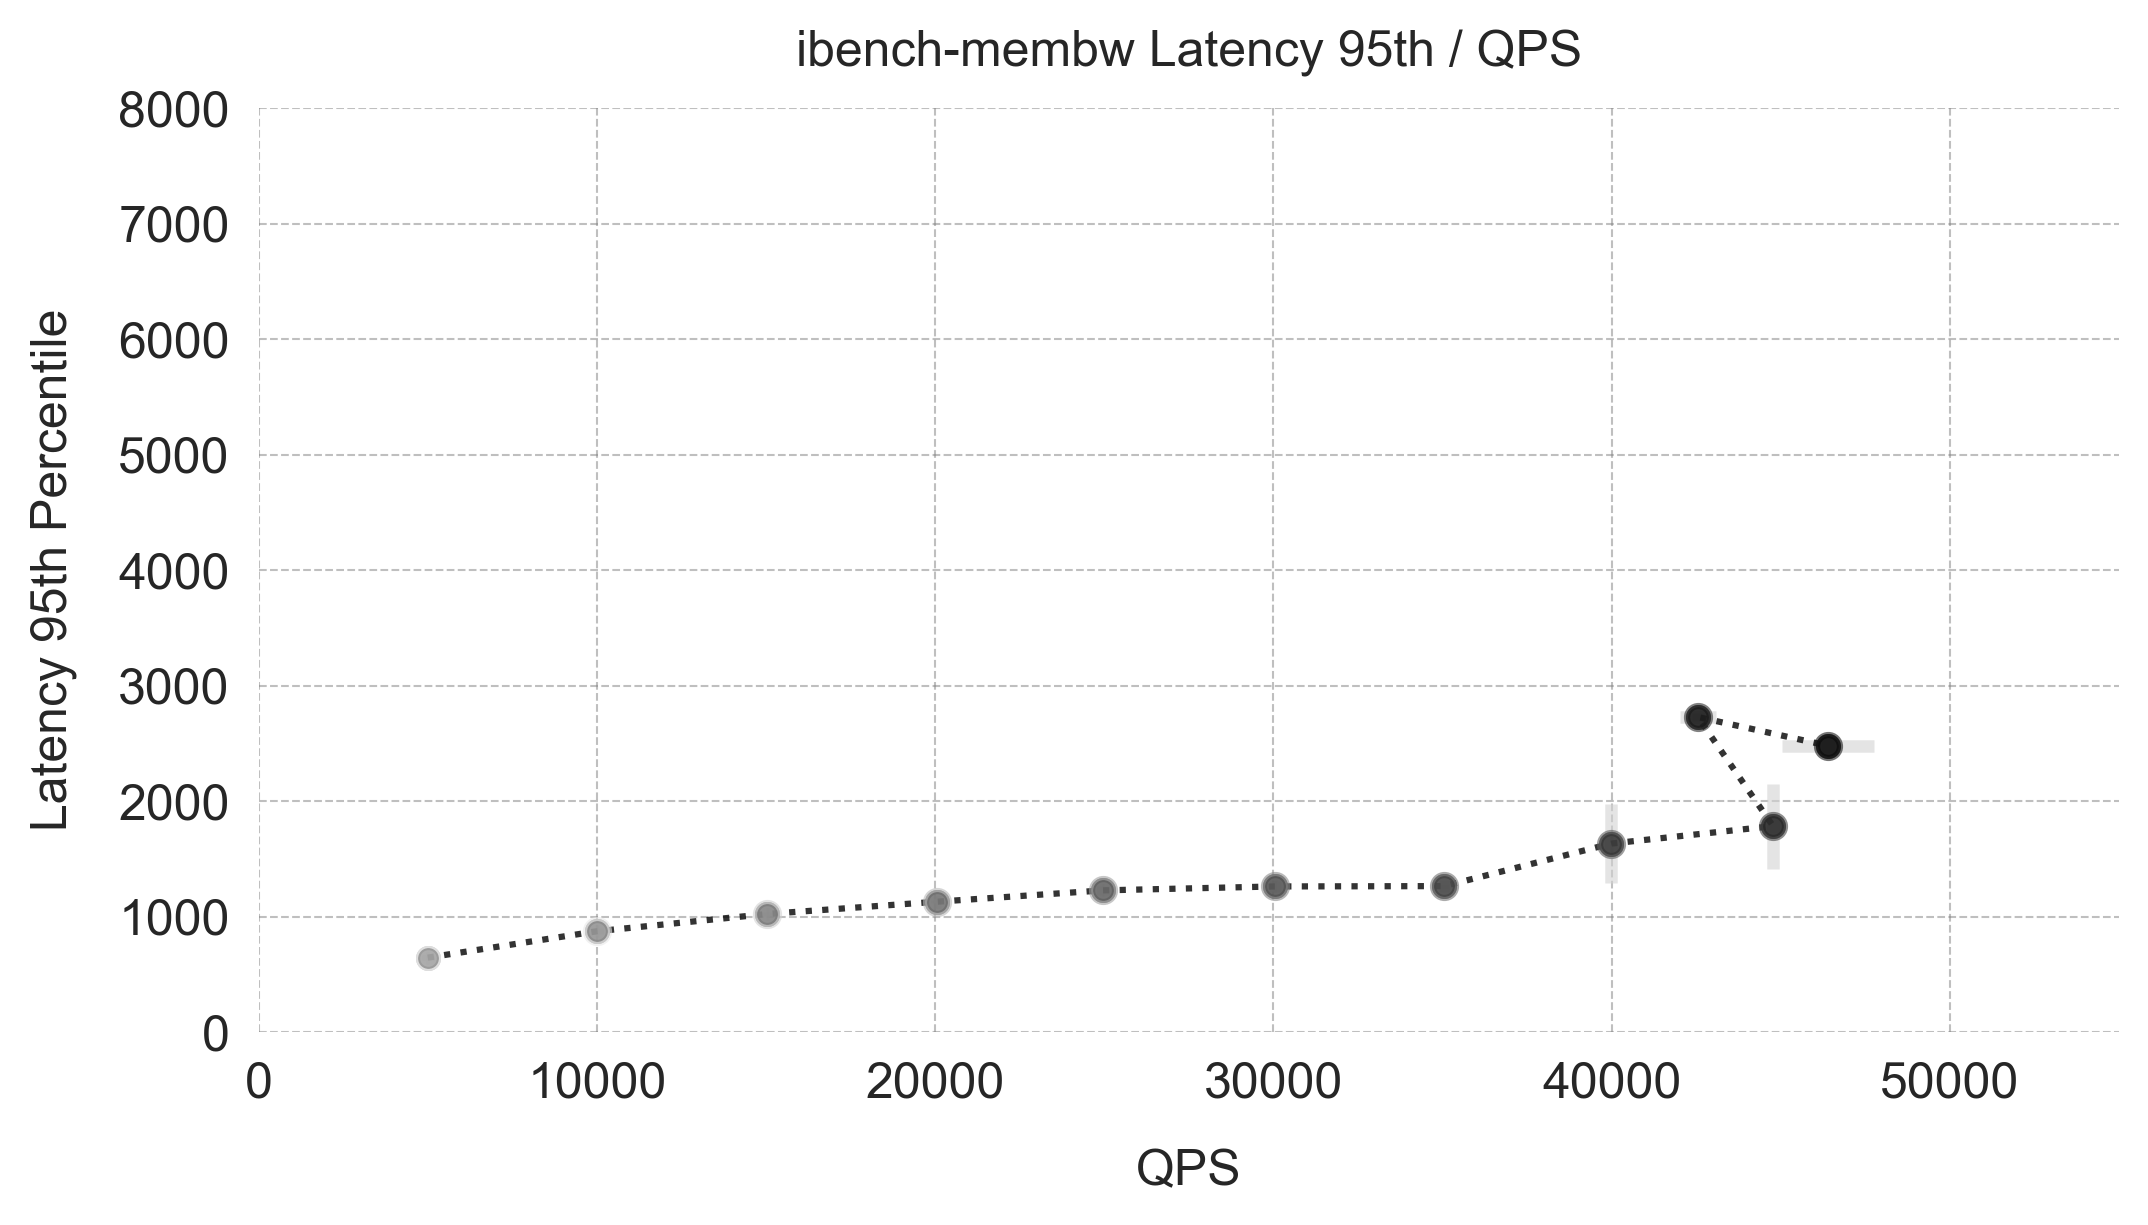

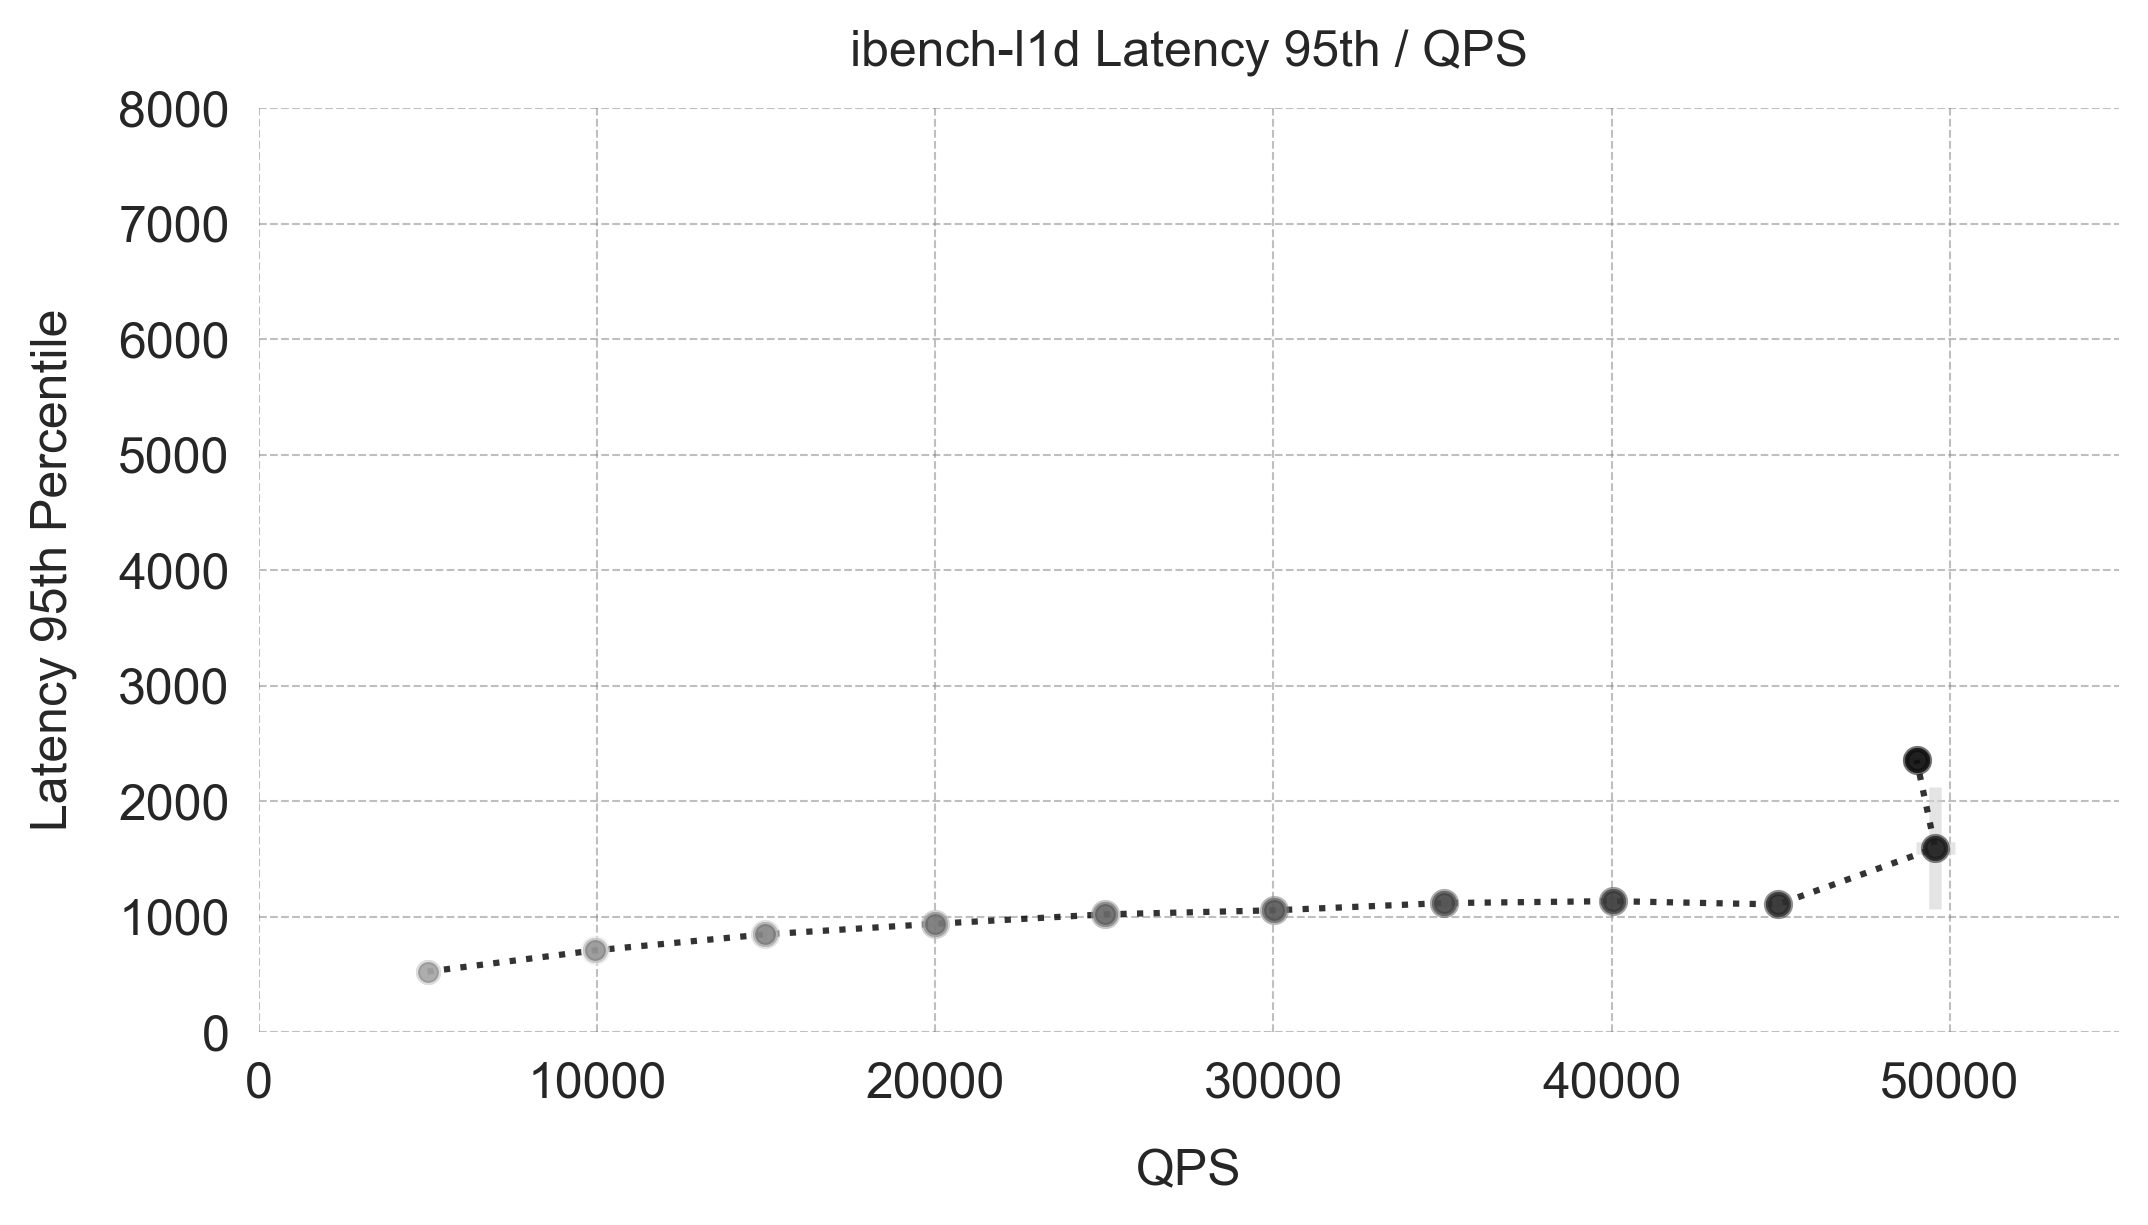

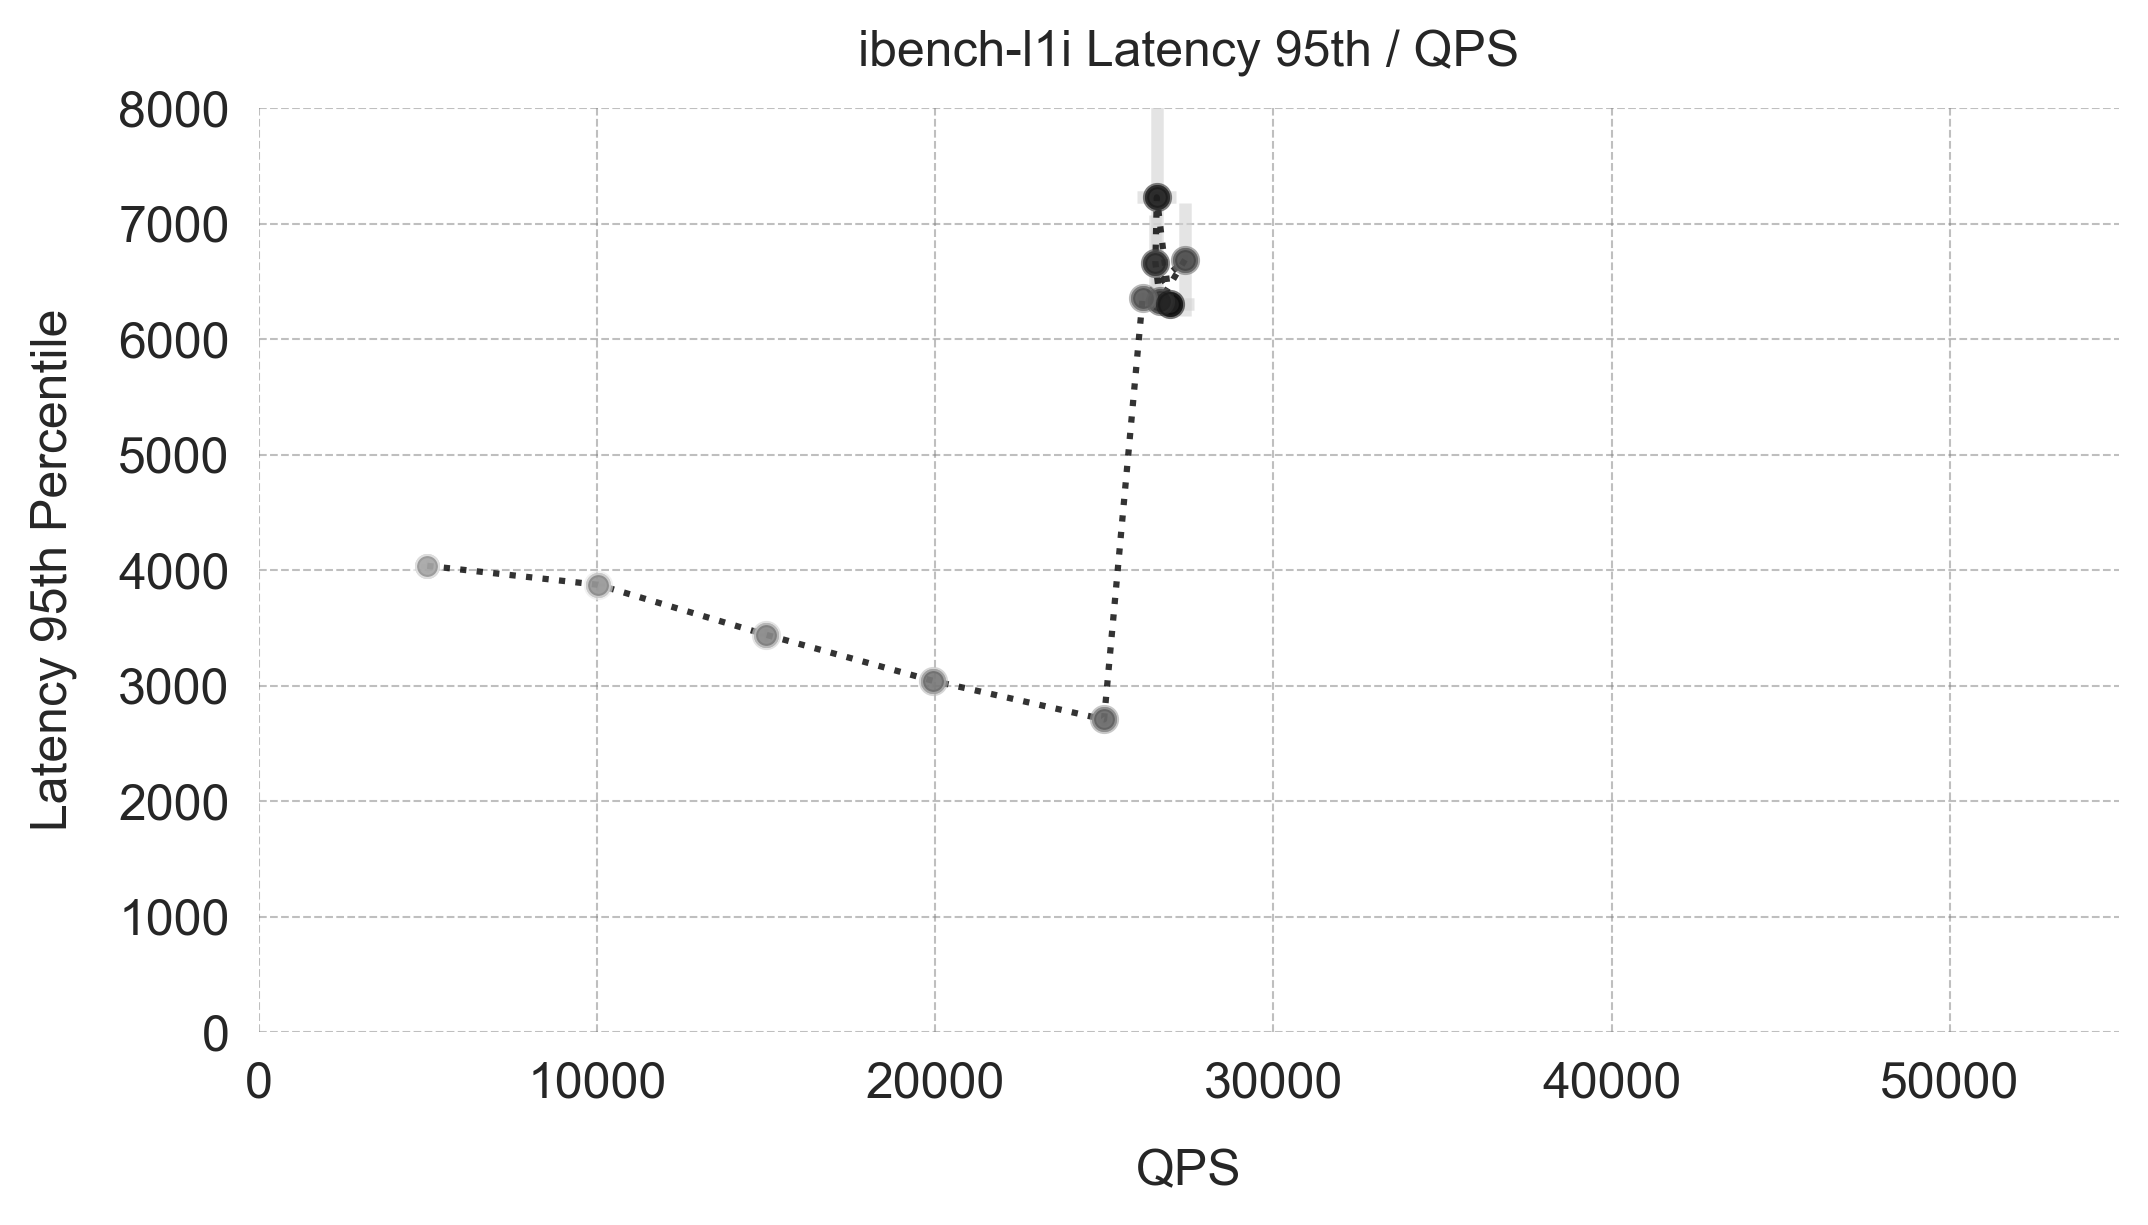

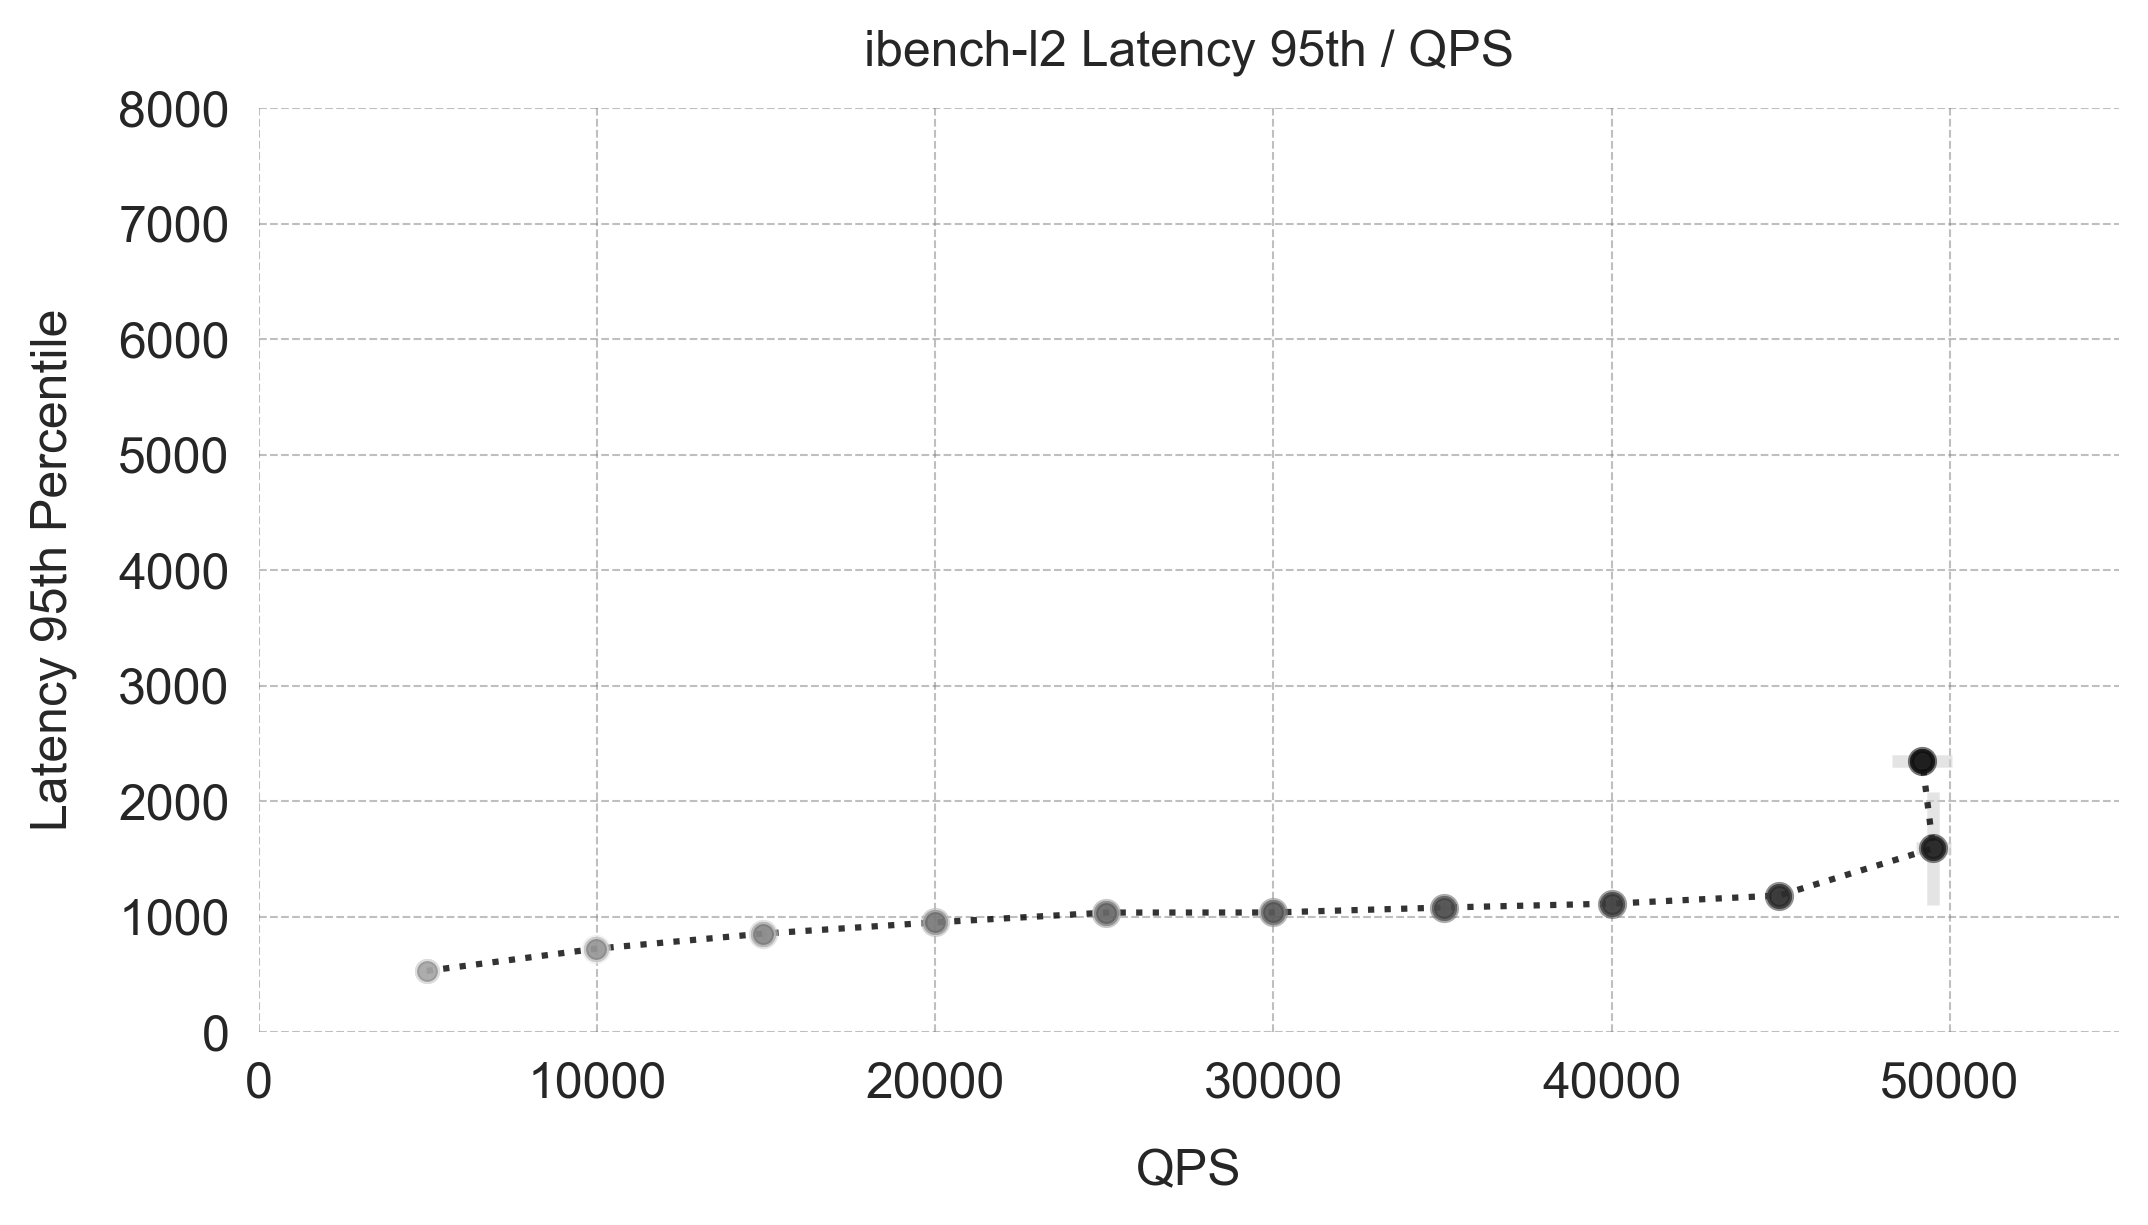

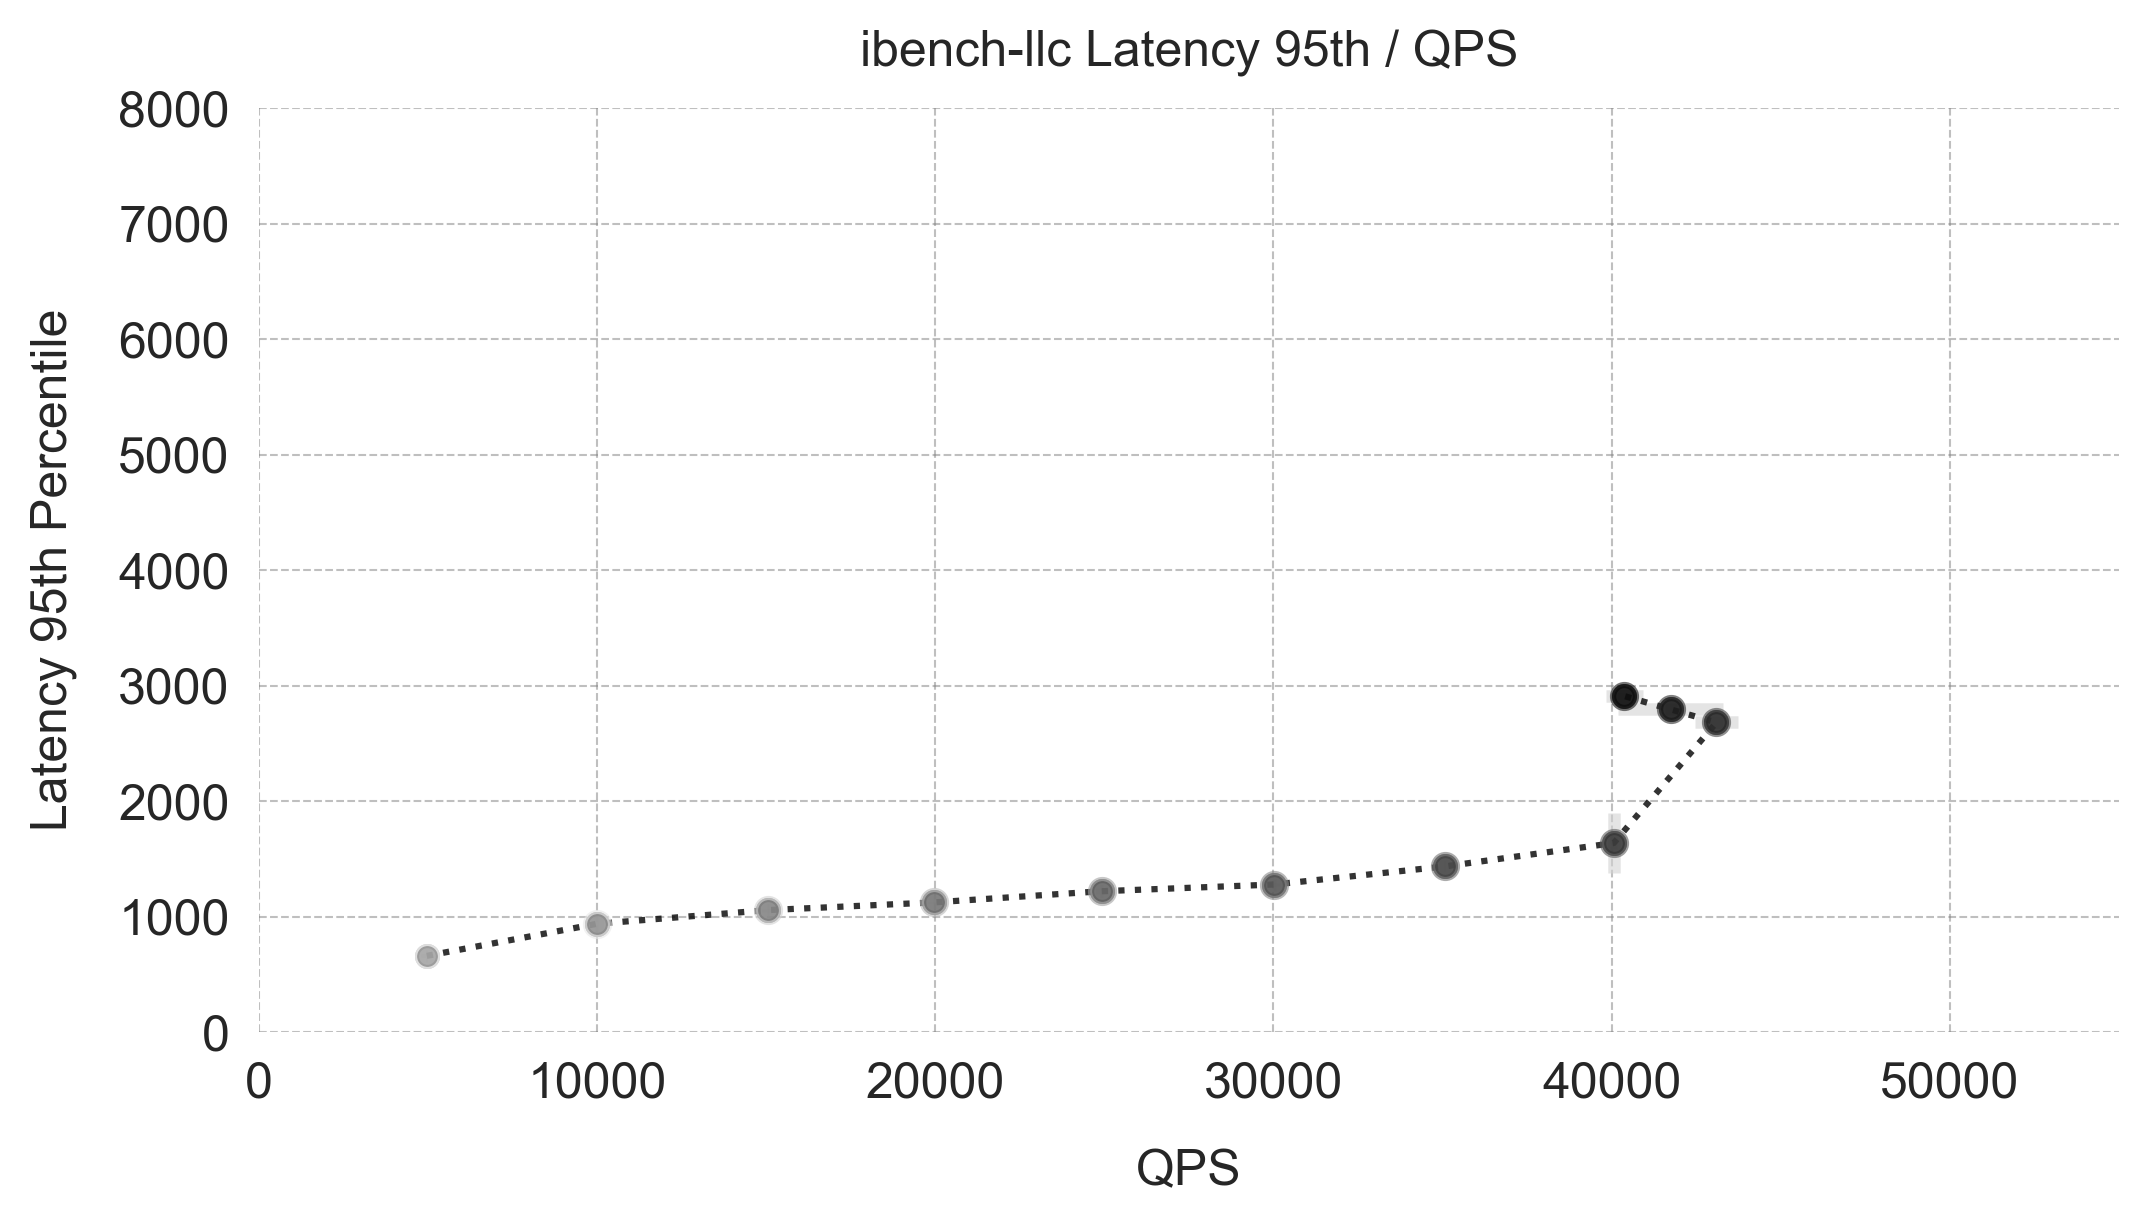

FileNotFoundError: [Errno 2] No such file or directory: 'results/no-interference'

In [5]:
from scripts.utils import *

benchmarks = ["ibench-cpu", "ibench-membw", "ibench-l1d", "ibench-l1i", "ibench-l2", "ibench-llc", "no_interference"]

for benchmark in benchmarks:
    dfs = load_run_data_folder(f"results/{benchmark}")
    p95_mean, p95_std = get_mean_std(dfs, 'p95')
    qps_mean, qps_std = get_mean_std(dfs, 'QPS')
    plot_errorbar(
        qps_mean,
        p95_mean,
        qps_std,
        p95_std,
        title=f"{benchmark} Latency 95th / QPS",
        xlim=(0, 55e3),
        ylim=(0, 8e3),
        colored=True,
    )

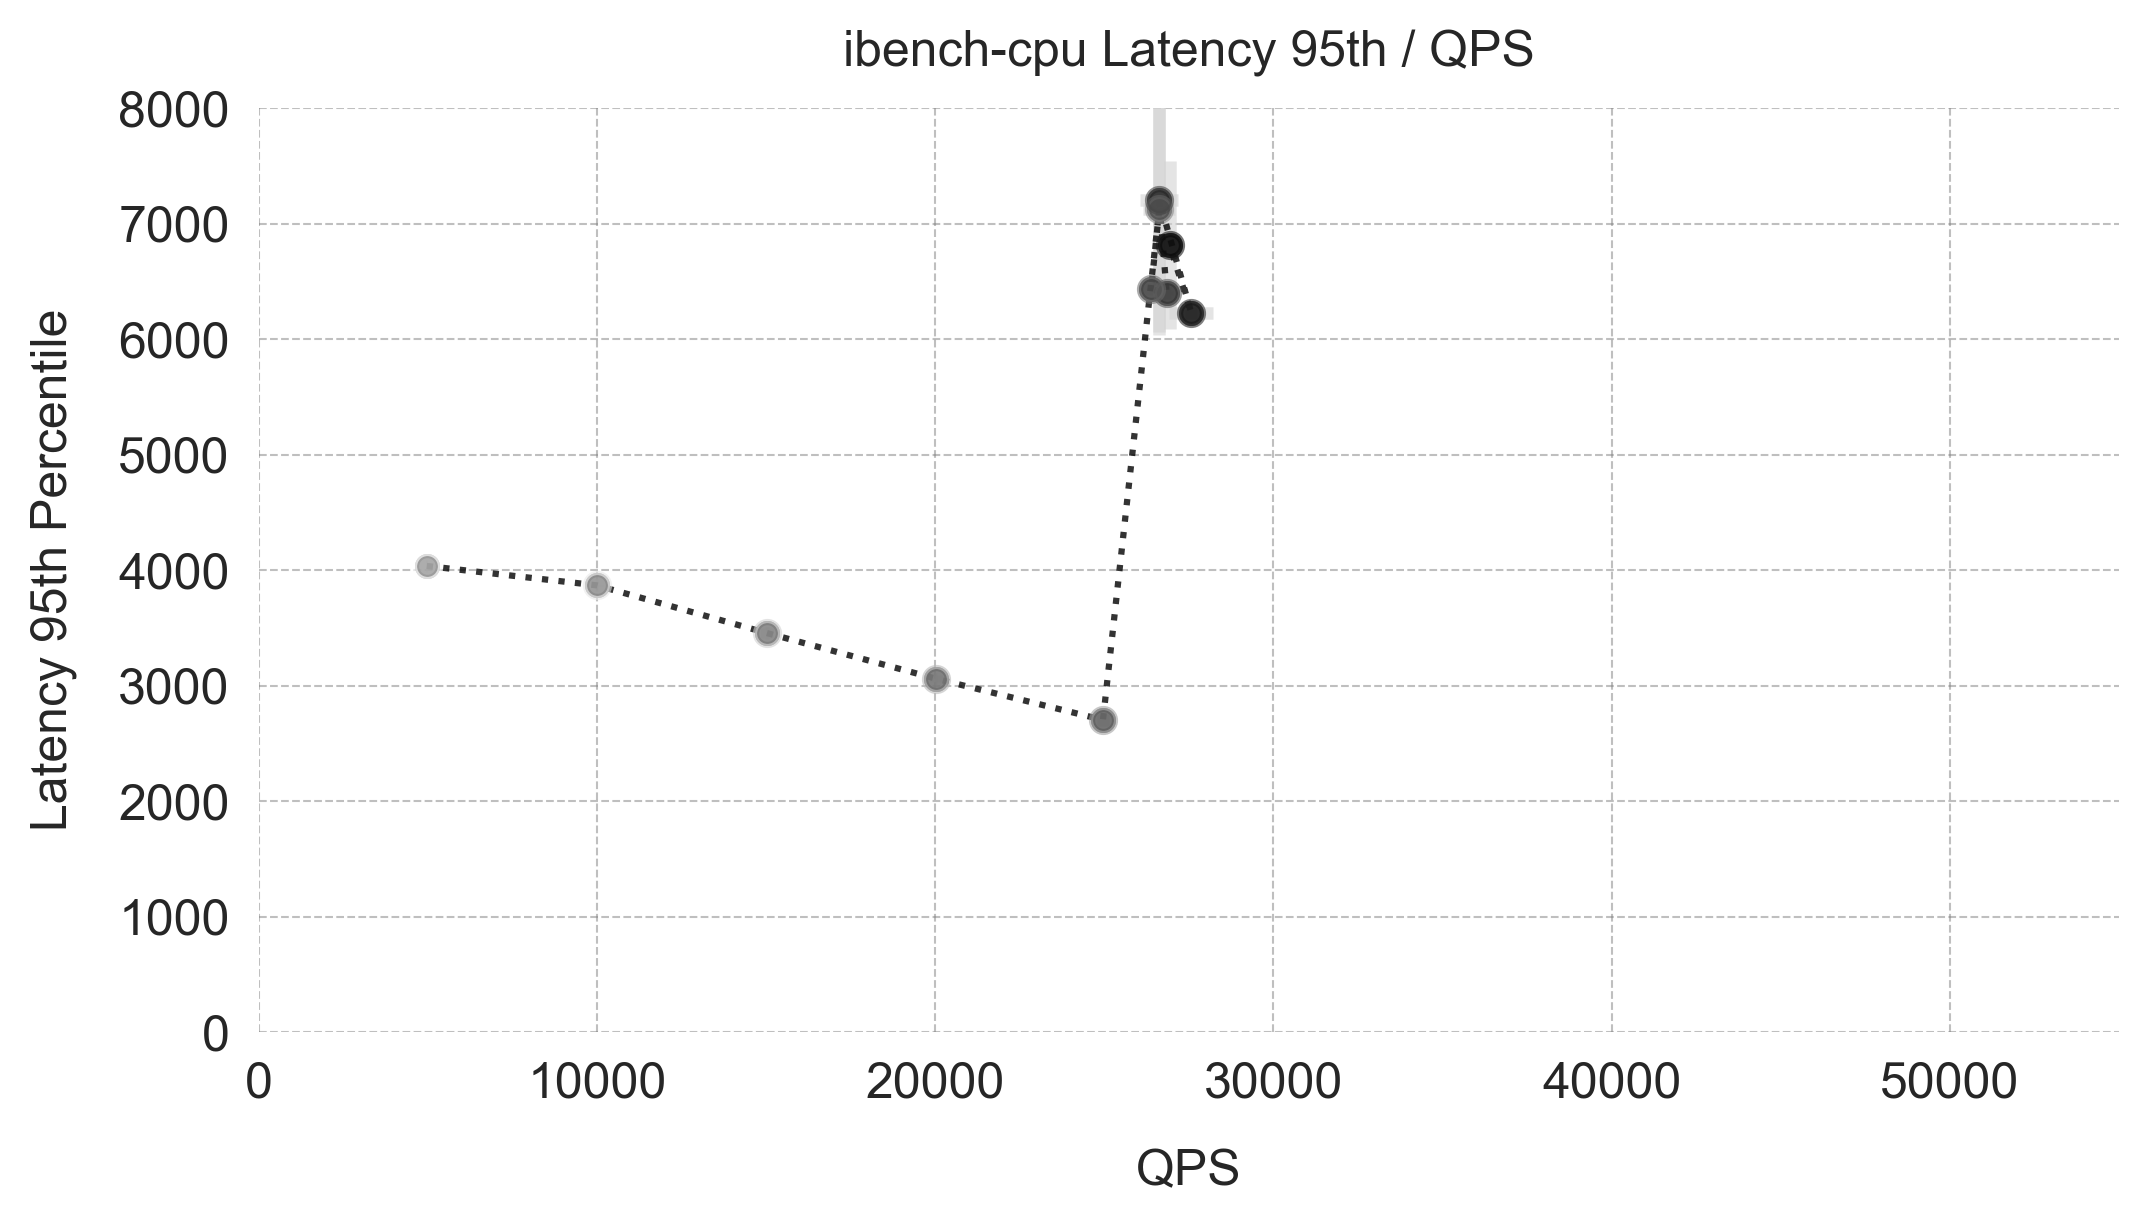

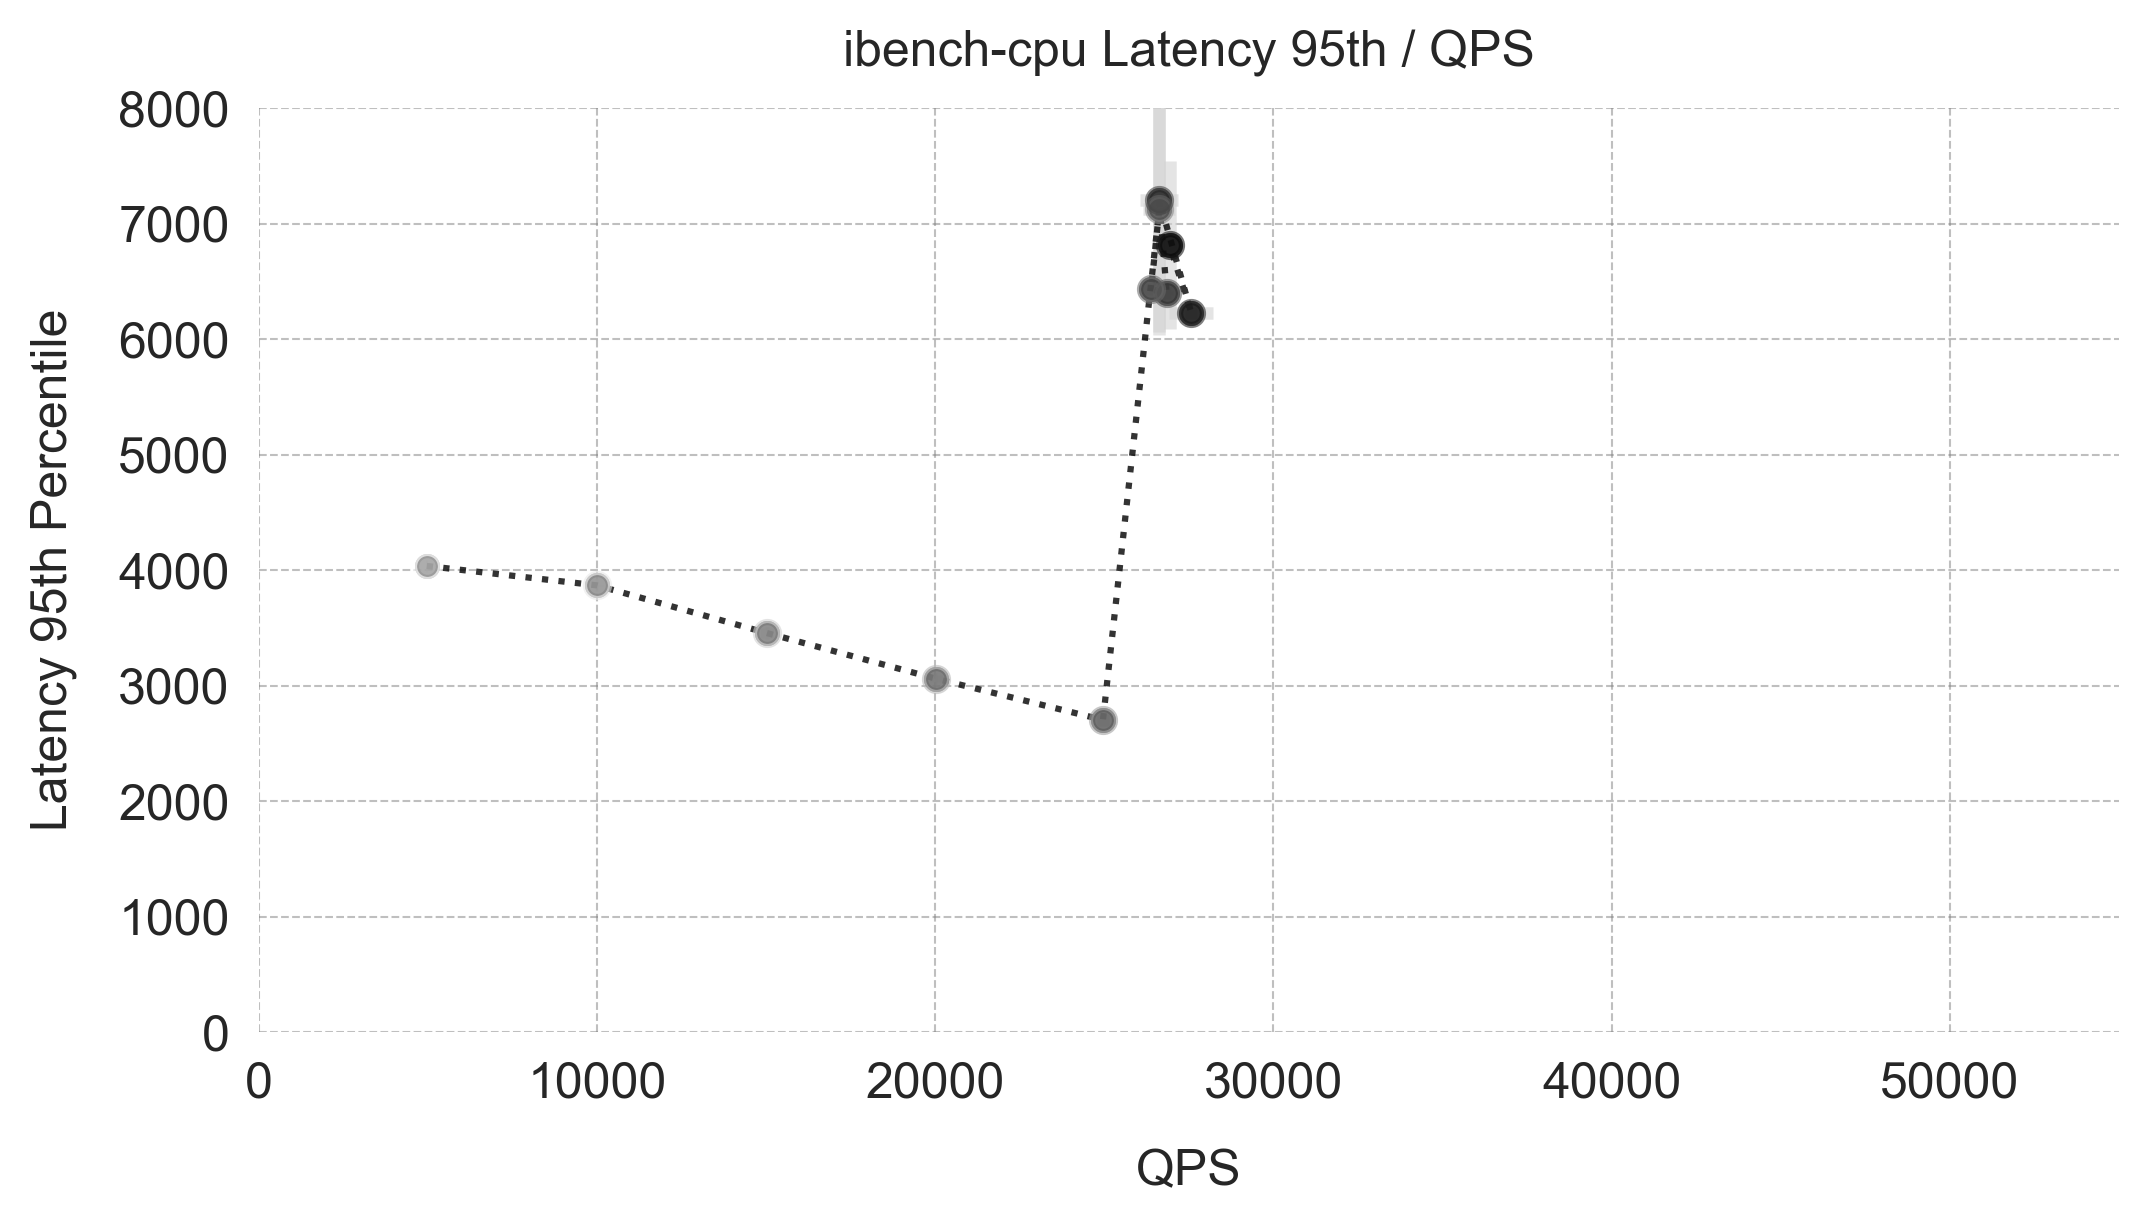